# Letter recognition notebook

## Data setup

import the basic libraries and read the data in. I also needed to preprocess the target data in order to organize this as a multiouput classification problem.

In [64]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
InteractiveShell.ast_node_interactivity = "all"

df = pd.read_csv('data/letter-recognition.csv')
display(df.head())

lb = preprocessing.LabelBinarizer()
lb.fit(df.ix[:, 0:1])
target = lb.transform(df.ix[:, 0:1])

print(df.head())
print(pd.DataFrame(target).head())

Splitting the data up into test and training data

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.ix[:, 1:], target, test_size=0.3, random_state=42)

## Learning Algorithms

### Decision trees

Optimizing the parameters of the decision tree and setting it as the optimized algorithm.

In [21]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn import svm, tree
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'estimator__max_depth': [1, 10, 25, 50], 'estimator__max_leaf_nodes': [2, 10, 15, 25, 50]}]
dt_clf = GridSearchCV(MultiOutputClassifier(tree.DecisionTreeClassifier(), n_jobs=-1), tuned_parameters, cv=10)
dt_clf.fit(X_train, y_train)
dt_optimized = dt_clf.best_estimator_
print(dt_clf.best_params_)

GridSearchCV(cv=10, error_score='raise',
       estimator=MultiOutputClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
           n_jobs=-1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'estimator__max_depth': [1, 10, 25, 50], 'estimator__max_leaf_nodes': [2, 10, 15, 25, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'estimator__max_depth': 50, 'estimator__max_leaf_nodes': 50}


In [25]:
dt_optimized.fit(X_train, y_train)
dt_optimized.score(X_test, y_test)

MultiOutputClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=50, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
           n_jobs=-1)

0.74316666666666664

<module 'matplotlib.pyplot' from '/Users/michaelbecker/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

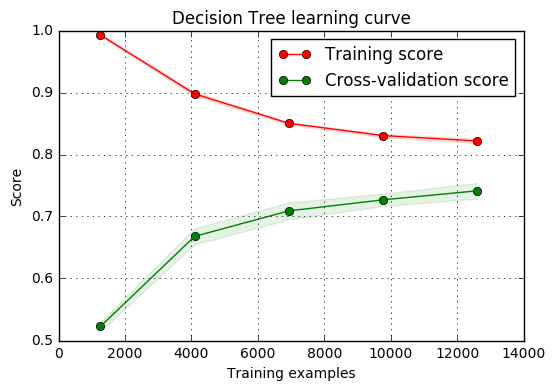

In [89]:
from sklearn.model_selection import learning_curve
from plot_learning_curve import plot_learning_curve
import matplotlib.pyplot as plt

plot_learning_curve(dt_optimized, title='Decision Tree learning curve', X=X_train, y=y_train, cv=10)
plt.show()

### k-nn

In [90]:
from sklearn.neighbors import KNeighborsClassifier

tuned_parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 5, 10]}]
knn_clf = GridSearchCV(KNeighborsClassifier(n_neighbors=1), tuned_parameters, cv=10)
knn_clf.fit(X_train, y_train)
knn_optimized = knn_clf.best_estimator_
print(knn_clf.best_params_)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'n_neighbors': 1, 'weights': 'uniform'}


In [91]:
knn_optimized.fit(X_train, y_train)
knn_optimized.score(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

0.94950000000000001

<module 'matplotlib.pyplot' from '/Users/michaelbecker/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

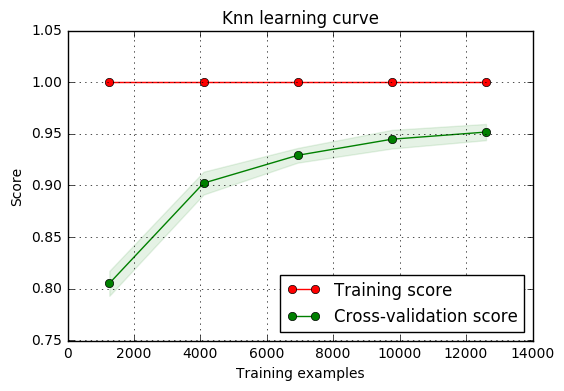

In [92]:
plot_learning_curve(knn_optimized, title='Knn learning curve', X=X_train, y=y_train, cv=10)
plt.show()

### Support Vector Machines

In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_clf = OneVsRestClassifier(SVC(C=1))
cross_val_score(svm_clf, X_train, y_train, cv=10).mean()

svm_clf = OneVsRestClassifier(SVC(C=10))
cross_val_score(svm_clf, X_train, y_train, cv=10).mean()

svm_clf = OneVsRestClassifier(SVC(C=100))
cross_val_score(svm_clf, X_train, y_train, cv=10).mean()

0.90421428571428586

0.93971428571428572

0.93907142857142856

In [93]:
svm_optimized = OneVsRestClassifier(SVC(C=10))

In [94]:
svm_optimized.fit(X_train, y_train)
svm_optimized.score(X_test, y_test)

OneVsRestClassifier(estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

0.9428333333333333

<module 'matplotlib.pyplot' from '/Users/michaelbecker/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

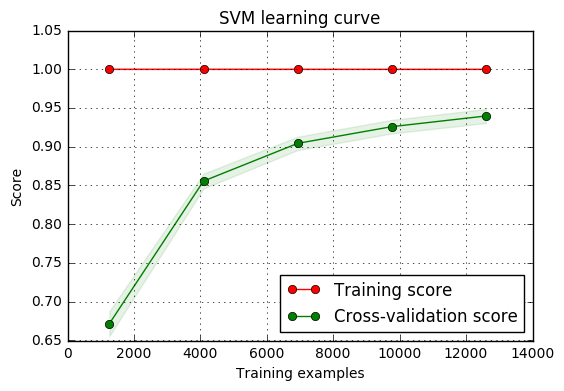

In [95]:
plot_learning_curve(svm_optimized, title='SVM learning curve', X=X_train, y=y_train, cv=10)
plt.show()

### Artificial Neural Networks

In [50]:
from sklearn.neural_network import MLPClassifier

tuned_parameters = [{'hidden_layer_sizes': [(3, 2), (4, 2), (5, 2), (6, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2)]}]
ann_clf = GridSearchCV(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1), tuned_parameters, cv=10)
ann_clf.fit(X_train, y_train)
ann_optimized = ann_clf.best_estimator_
print(ann_clf.best_params_)

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'hidden_layer_sizes': [(3, 2), (4, 2), (5, 2), (6, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'hidden_layer_sizes': (6, 2)}


In [51]:
ann_optimized.fit(X_train, y_train)
ann_optimized.score(X_test, y_test)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

0.029833333333333333

<module 'matplotlib.pyplot' from '/Users/michaelbecker/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

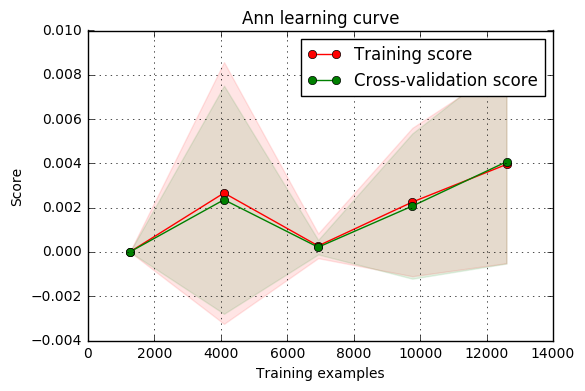

In [52]:
plot_learning_curve(ann_optimized, title='Ann learning curve', X=X_train, y=y_train, cv=10)
plt.show()

### Adaboost

Optimizing the hyperparameters by using the cross validation scoring metric

In [82]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

boost_clf = OneVsRestClassifier(AdaBoostClassifier(n_estimators=50))
cross_val_score(boost_clf, X_train, y_train, cv=10).mean()

boost_clf = OneVsRestClassifier(AdaBoostClassifier(n_estimators=100))
cross_val_score(boost_clf, X_train, y_train, cv=10).mean()

boost_clf = OneVsRestClassifier(AdaBoostClassifier(n_estimators=150))
cross_val_score(boost_clf, X_train, y_train, cv=10).mean()

boost_clf = OneVsRestClassifier(AdaBoostClassifier(n_estimators=200))
cross_val_score(boost_clf, X_train, y_train, cv=10).mean()

0.6617857142857142

0.69914285714285718

0.71250000000000002

0.71714285714285719

In [85]:
boost_optimized = OneVsRestClassifier(AdaBoostClassifier(n_estimators=200))

In [86]:
boost_optimized.fit(X_train, y_train)
boost_optimized.score(X_test, y_test)

OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None),
          n_jobs=1)

0.72099999999999997

<module 'matplotlib.pyplot' from '/Users/michaelbecker/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

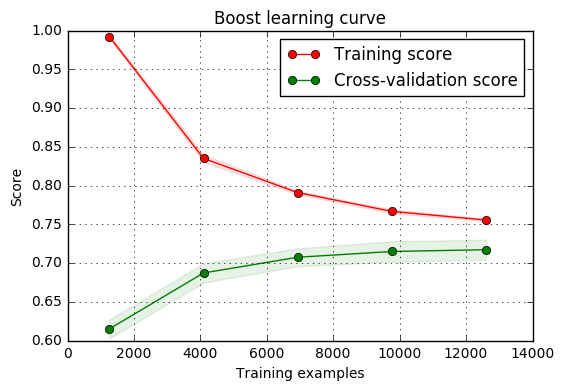

In [87]:
plot_learning_curve(boost_optimized, title='Boost learning curve', X=X_train, y=y_train, cv=10)
plt.show()

## Analysis

### Performance analysis

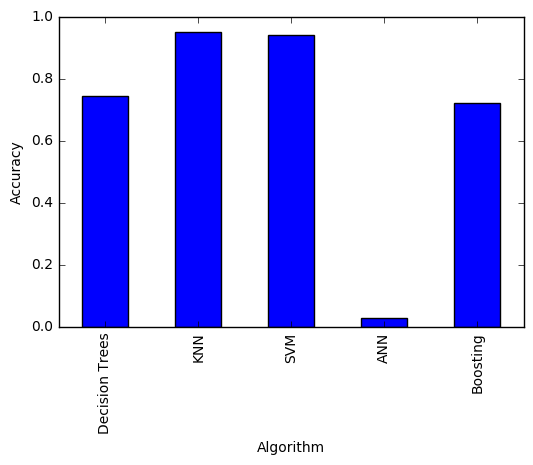

In [109]:
scores = []
scores.append(dt_optimized.score(X_test, y_test))
scores.append(knn_optimized.score(X_test, y_test))
scores.append(svm_optimized.score(X_test, y_test))
scores.append(ann_optimized.score(X_test, y_test))
scores.append(boost_optimized.score(X_test, y_test))

scores_df = pd.DataFrame(scores, index=['Decision Trees', 'KNN', 'SVM', 'ANN', 'Boosting'])
ax = scores_df.plot(kind='bar', legend=False)
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
plt.show()

### Time analysis

MultiOutputClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=50, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
           n_jobs=-1)

0.74633333333333329

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

0.94950000000000001

OneVsRestClassifier(estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

0.9428333333333333

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

0.029833333333333333

OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None),
          n_jobs=1)

0.72099999999999997

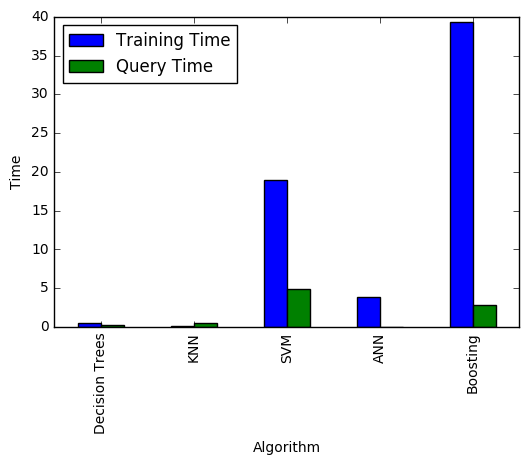

In [112]:
import time 

start_dt_fit = time.time()
dt_optimized.fit(X_train, y_train)
end_dt_fit = time.time()
dt_optimized.score(X_test, y_test)
end_dt_query = time.time()

start_knn_fit = time.time()
knn_optimized.fit(X_train, y_train)
end_knn_fit = time.time()
knn_optimized.score(X_test, y_test)
end_knn_query = time.time()

start_svm_fit = time.time()
svm_optimized.fit(X_train, y_train)
end_svm_fit = time.time()
svm_optimized.score(X_test, y_test)
end_svm_query = time.time()

start_ann_fit = time.time()
ann_optimized.fit(X_train, y_train)
end_ann_fit = time.time()
ann_optimized.score(X_test, y_test)
end_ann_query = time.time()

start_boost_fit = time.time()
boost_optimized.fit(X_train, y_train)
end_boost_fit = time.time()
boost_optimized.score(X_test, y_test)
end_boost_query = time.time()

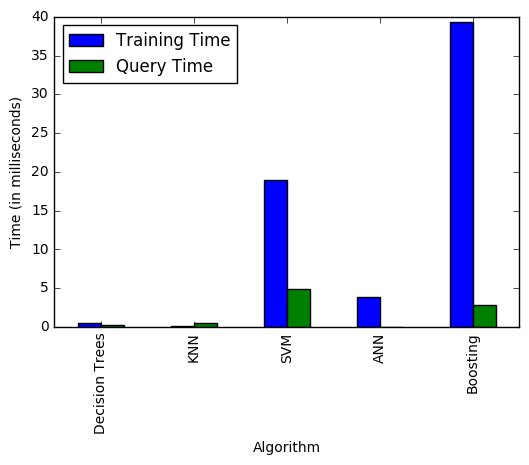

In [113]:
times = []
times.append([(end_dt_fit - start_dt_fit), (end_dt_query - end_dt_fit)])
times.append([(end_knn_fit - start_knn_fit), (end_knn_query - end_knn_fit)])
times.append([(end_svm_fit - start_svm_fit), (end_svm_query - end_svm_fit)])
times.append([(end_ann_fit - start_ann_fit), (end_ann_query - end_ann_fit)])
times.append([(end_boost_fit - start_boost_fit), (end_boost_query - end_boost_fit)])

times_df = pd.DataFrame(times, index=['Decision Trees', 'KNN', 'SVM', 'ANN', 'Boosting'], columns=['Training Time', 'Query Time'])
ax = times_df.plot(kind='bar')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Time (in milliseconds)')
plt.show()